In [2]:
import numpy as np
import pandas as pd
import jscatter
import h5py
import os
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
import logomaker

In [3]:
data_dir = "/oak/stanford/groups/akundaje/atwang/gp_mouse_sc_analyses/results/assembly_2/cavpor_dnazoo/modisco_seqlet_occurences/fibroblast"
data_path = os.path.join(data_dir, "occurences_annotated.tsv")
names_path = os.path.join(data_dir, "seqlet_names.txt")

In [4]:
data = pd.read_csv(data_path, sep='\t', header=0)
data

chr_x   start_x     end_x                   1   2_x 3_x  \
0       HiC_scaffold_1     35659     35940        total_peak_1   193   .   
1       HiC_scaffold_1     65624     65907        total_peak_4    51   .   
2       HiC_scaffold_1     73618     73961        total_peak_6    64   .   
3       HiC_scaffold_1    109813    110195        total_peak_8   430   .   
4       HiC_scaffold_1    111157    111526       total_peak_9a    37   .   
...                ...       ...       ...                 ...   ...  ..   
115549  HiC_scaffold_9  73115003  73115978  total_peak_173460b   611   .   
115550  HiC_scaffold_9  73174354  73175267  total_peak_173461a    25   .   
115551  HiC_scaffold_9  73174354  73175267  total_peak_173461b  3631   .   
115552  HiC_scaffold_9  73174354  73175267  total_peak_173461c  1064   .   
115553  HiC_scaffold_9  73242405  73243359   total_peak_173464  5906   .   

             4_x        5_x        6_x  summit_x  ...  xs.pos.pattern_42  \
0        6.67740   19.38830   17.07900       156  ...                  0   
1        3.14231    5.18970    3.31114       174  ...                  0   
2        3.53509    6.46514    4.51548       203  ...                  0   
3        8.36771   43.06520   40.46450       171  ...                  0   
4        2.32986    3.76829    2.00589       126  ...                  0   
...          ...        ...        ...       ...  ...                ...   
115549   8.31683   61.16600   58.42990       723  ...                  0   
115550   1.68522    2.52675    0.90640        99  ...                  0   
115551  22.54960  363.12200  359.42300       434  ...                  0   
115552   9.97297  106.44000  103.48800       689  ...                  0   
115553  21.02830  590.68000  586.22700       474  ...                  0   

        xs.pos.pattern_43  xs.pos.pattern_44  xs.pos.pattern_5  \
0                       0                  0                 0   
1                       0                  0                 0   
2                       0                  0                 0   
3                       0                  0                 0   
4                       0                  0                 0   
...                   ...                ...               ...   
115549                  0                  0                 0   
115550                  0                  0                 0   
115551                  0                  0                 0   
115552                  0                  0                 0   
115553                  0                  0                 0   

        xs.pos.pattern_6  xs.pos.pattern_7  xs.pos.pattern_8  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 0   
3                      0                 0                 1   
4                      0                 0                 0   
...                  ...               ...               ...   
115549                 0                 0                 0   
115550                 0                 0                 0   
115551                 0                 0                 0   
115552                 0                 0                 0   
115553                 0                 0                 0   

        xs.pos.pattern_9  xs.neg.pattern_0  xs.neg.pattern_1  
0                      0                 0                 0  
1                      0                 0                 0  
2                      0                 0                 0  
3                      0                 0                 0  
4                      0                 0                 0  
...                  ...               ...               ...  
115549                 0                 0                 0  
115550                 0                 0                 0  
115551                 2                 0                 0  

In [5]:
with open(names_path) as f:
    names = [line.rstrip("\n") for line in f]
names[:5]

['ss.pos.pattern_0',
 'ss.pos.pattern_1',
 'ss.pos.pattern_10',
 'ss.pos.pattern_11',
 'ss.pos.pattern_12']

In [6]:
from scipy.stats import mannwhitneyu

In [7]:
def calc_lfc(df, pattern):
    hits = df[pattern].to_numpy() > 0
    counts_score = np.abs(df["diff_mean_qn"].to_numpy())
    shap_score = df["contrib_counts_e_dist"].to_numpy()
    
    counts_lfc = np.log10(counts_score[hits].mean()) - np.log10(counts_score[~hits].mean())
    shap_lfc = np.log10(shap_score[hits].mean()) - np.log10(shap_score[~hits].mean())

    _, counts_p = mannwhitneyu(counts_score[hits], counts_score[~hits])
    _, shap_p = mannwhitneyu(shap_score[hits], shap_score[~hits])

    counts_nlp = -np.log10(counts_p)
    shap_nlp = -np.log10(shap_p)

    return counts_lfc, shap_lfc, counts_nlp, shap_nlp


In [8]:
from IPython.display import display


In [9]:
records = []
for n in names:
    counts_lfc, shap_lfc, counts_nlp, shap_nlp = calc_lfc(data, n)
    # print(n, counts_lfc, shap_lfc)
    records.append((n, counts_lfc, shap_lfc, counts_nlp, shap_nlp),)
    
scores = pd.DataFrame.from_records(records, columns=['pattern', 'counts_lfc', 'shap_lfc', 'counts_nlp', 'shap_nlp'])
scores = scores.sort_values(by=['shap_nlp'], ascending=False)
with pd.option_context('display.max_rows', 1000):
    display(scores)


/tmp/ipykernel_21366/3756136185.py:13: RuntimeWarning: divide by zero encountered in log10
  shap_nlp = -np.log10(shap_p)
/tmp/ipykernel_21366/3756136185.py:12: RuntimeWarning: divide by zero encountered in log10
  counts_nlp = -np.log10(counts_p)


pattern  counts_lfc  shap_lfc  counts_nlp    shap_nlp
0    ss.pos.pattern_0   -0.027284 -0.053900    2.759417         inf
60   xs.pos.pattern_3   -0.173474 -0.039420  228.440441         inf
37   xs.pos.pattern_0   -0.028022 -0.054990    3.675650         inf
12   ss.pos.pattern_2   -0.208633 -0.038052         inf         inf
29   ss.pos.pattern_4   -0.182534 -0.049597  246.774225         inf
32   ss.pos.pattern_7   -0.327965 -0.056284  256.246895         inf
77   xs.pos.pattern_5   -0.153068 -0.048627  249.753700         inf
78   xs.pos.pattern_6   -0.329021 -0.059385  228.147257         inf
33   ss.pos.pattern_8   -0.131208 -0.040784   75.773230  302.566939
44  xs.pos.pattern_15    0.183877  0.060645   53.448795  256.620260
79   xs.pos.pattern_7   -0.092774 -0.036287   47.166597  233.226923
1    ss.pos.pattern_1    0.124559 -0.014723  228.383108  187.774037
4   ss.pos.pattern_12   -0.230796 -0.045789   71.853264  181.357508
43  xs.pos.pattern_14   -0.256945 -0.047733   71.526228  180.634552
51  xs.pos.pattern_21    0.245405  0.082360   27.625760  139.181404
7   ss.pos.pattern_15   -0.372201 -0.071644   50.293155  126.559846
48  xs.pos.pattern_19   -0.344427 -0.071610   47.192079  120.146232
42  xs.pos.pattern_13    0.145314  0.032985   39.419185  114.605410
81   xs.pos.pattern_9   -0.010105 -0.025160    4.454922   93.424030
40  xs.pos.pattern_11    0.163744  0.027038   54.029701   91.512342
50  xs.pos.pattern_20   -0.196935 -0.053339   31.903234   85.132579
47  xs.pos.pattern_18    0.121496  0.046313   12.523976   85.045504
10  ss.pos.pattern_18   -0.280647 -0.061112   27.724085   77.560662
46  xs.pos.pattern_17   -0.211458 -0.039645   36.517138   75.895095
71   xs.pos.pattern_4    0.114571  0.013950   91.358647   72.129180
38   xs.pos.pattern_1    0.133805 -0.007958  288.188608   63.037417
14  ss.pos.pattern_21   -0.289277 -0.054280   24.692280   59.831586
30   ss.pos.pattern_5    0.024557 -0.013675    0.482188   51.516436
8   ss.pos.pattern_16   -0.216554 -0.039355   23.299161   48.891692
6   ss.pos.pattern_14   -0.098337 -0.024937   21.940607   45.538957
54  xs.pos.pattern_24   -0.290445 -0.044840   19.715827   39.552513
52  xs.pos.pattern_22   -0.172489 -0.032752   11.524829   31.995692
53  xs.pos.pattern_23   -0.216447 -0.039566   15.297937   31.764145
58  xs.pos.pattern_28   -0.150454 -0.047794    7.553550   29.761893
69  xs.pos.pattern_38    0.236684  0.135808    6.900880   29.536280
56  xs.pos.pattern_26   -0.264522 -0.038883   14.595006   28.732488
57  xs.pos.pattern_27   -0.259964 -0.042601   14.165438   28.112390
5   ss.pos.pattern_13    0.007655 -0.016148    0.202880   25.314397
35   ss.neg.pattern_0    1.038723  0.326301   24.871785   25.204964
13  ss.pos.pattern_20   -0.187943 -0.030037   14.211955   23.773620
45  xs.pos.pattern_16    0.020554 -0.016017    1.330601   22.681826
65  xs.pos.pattern_34   -0.309800 -0.053719    5.967645   16.792574
49   xs.pos.pattern_2    0.127740  0.004862  184.675354   14.472580
16  ss.pos.pattern_23    0.016353 -0.020089    0.029114    7.260785
23   ss.pos.pattern_3    0.123910 -0.003481  153.486131    6.251493
3   ss.pos.pattern_11    0.117736  0.005705   41.650125    6.142525
31   ss.pos.pattern_6    0.159791  0.004402  115.910755    5.962154
36   ss.neg.pattern_1    0.122378 -0.047837    0.749734    5.465553
11  ss.pos.pattern_19    0.605604  0.022707   58.515460    4.830986
28  ss.pos.pattern_34   -0.386211 -0.047212    4.888077    4.315275
73  xs.pos.pattern_41    0.476967  0.035717    9.909966    3.758973
59  xs.pos.pattern_29    0.143879  0.014247    3.394221    3.366644
2   ss.pos.pattern_10    0.120707  0.003874   50.445135    3.339437
15  ss.pos.pattern_22    0.145859  0.009175    9.515474    2.866800
26  ss.pos.pattern_32    0.012847 -0.032187    0.416442    2.824556
83   xs.neg.pattern_1    0.109008 -0.025456    1.309714    2.803787
82   xs.neg.pattern_0    0.069405 -0.013273    1.287557    2.798827
17  ss.pos.pattern_24    0.131527  0.012414    1.997615    2.778795
9 

In [10]:
import seaborn as sns
sns.set()

In [11]:
def plot_pattern(pattern):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5), dpi=200)

    g = sns.scatterplot(data=data, x="diff_mean_qn", y="contrib_counts_e_dist", hue=pattern, s=3, edgecolor=None, hue_norm=(0,2), alpha=0.6, ax=ax1)
    g = sns.scatterplot(data=data, x="ss_mean", y="xs_mean", hue=pattern, s=3, edgecolor=None, hue_norm=(0,2), alpha=0.6, ax=ax2)

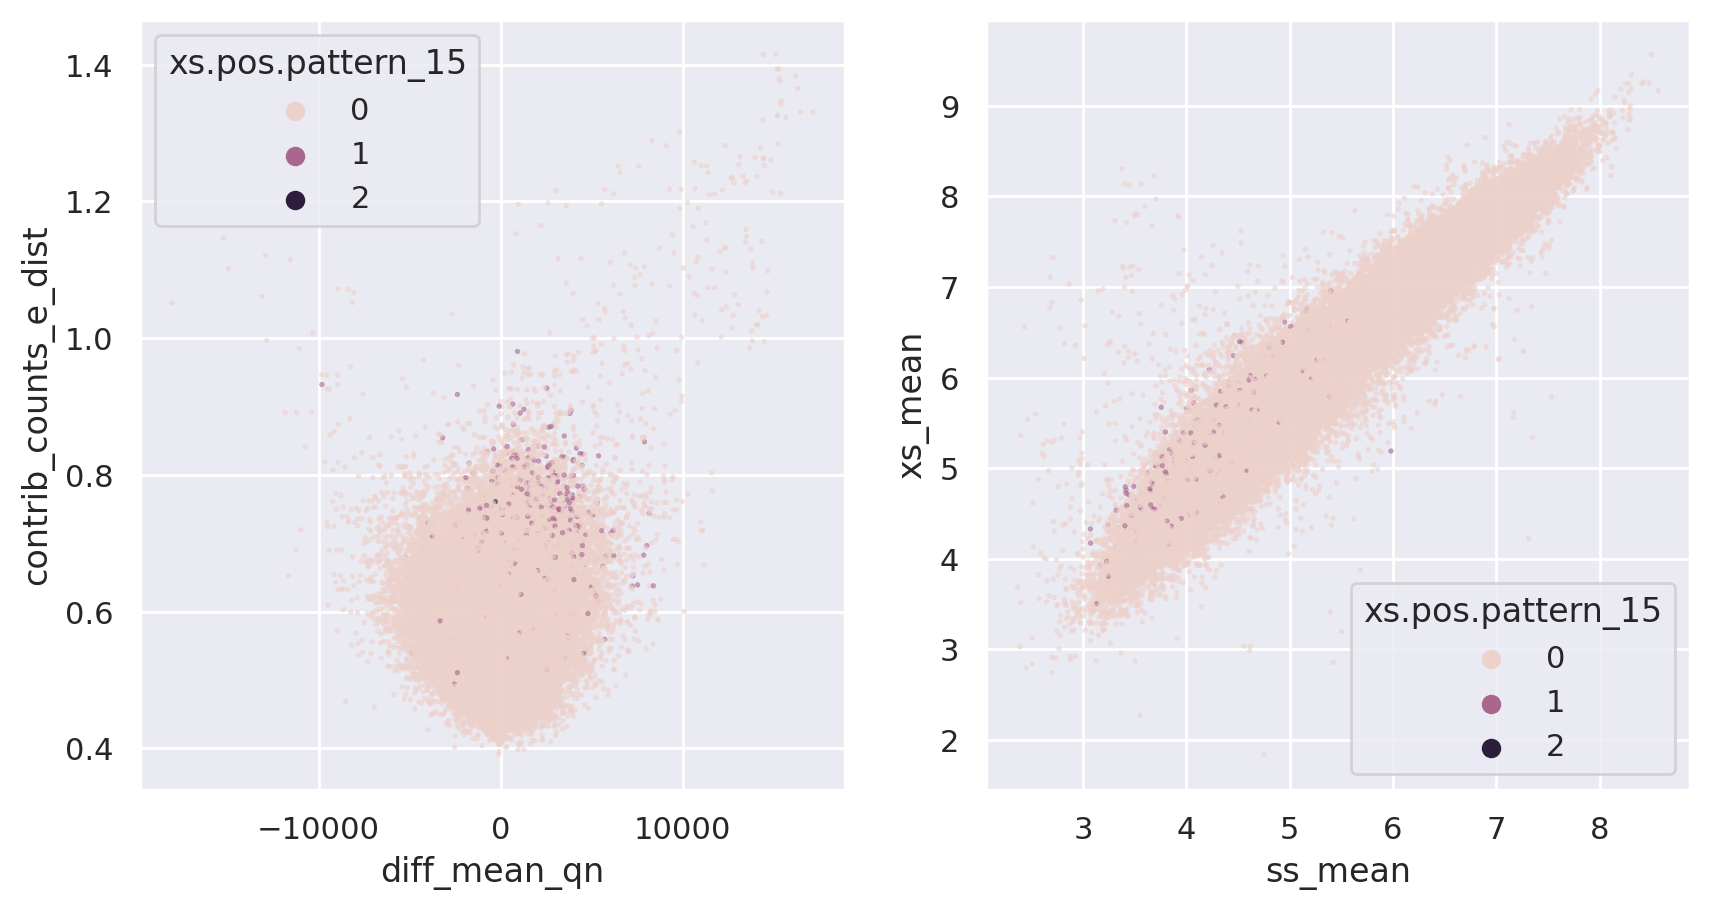

In [12]:
plot_pattern("xs.pos.pattern_15")


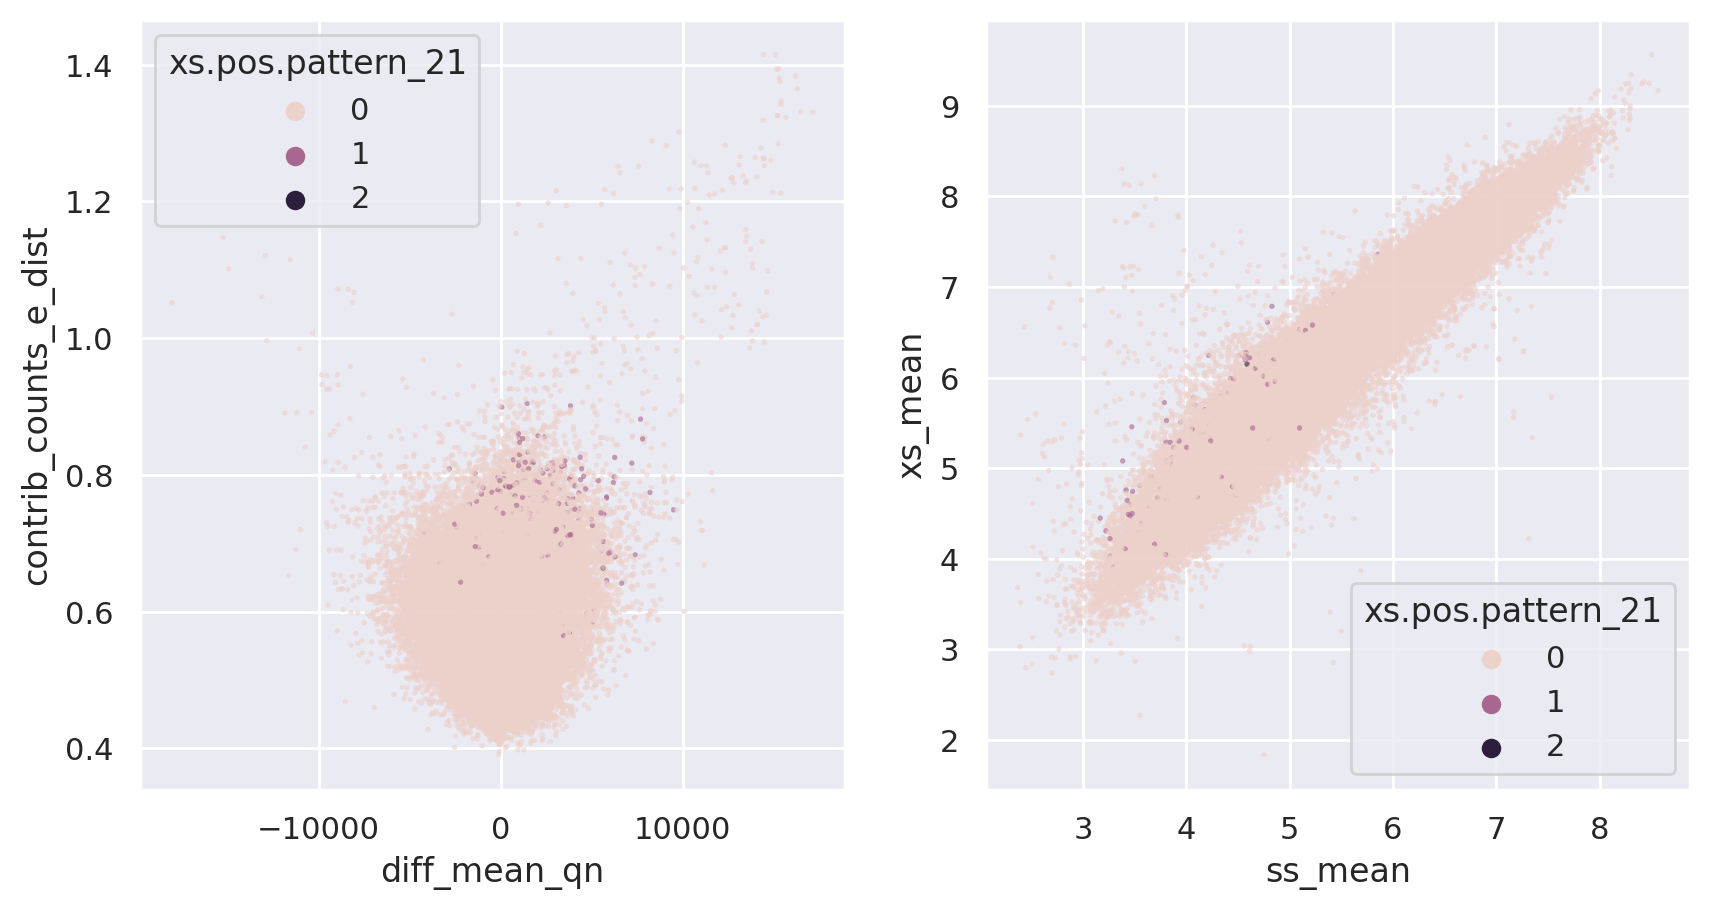

In [13]:
plot_pattern("xs.pos.pattern_21")


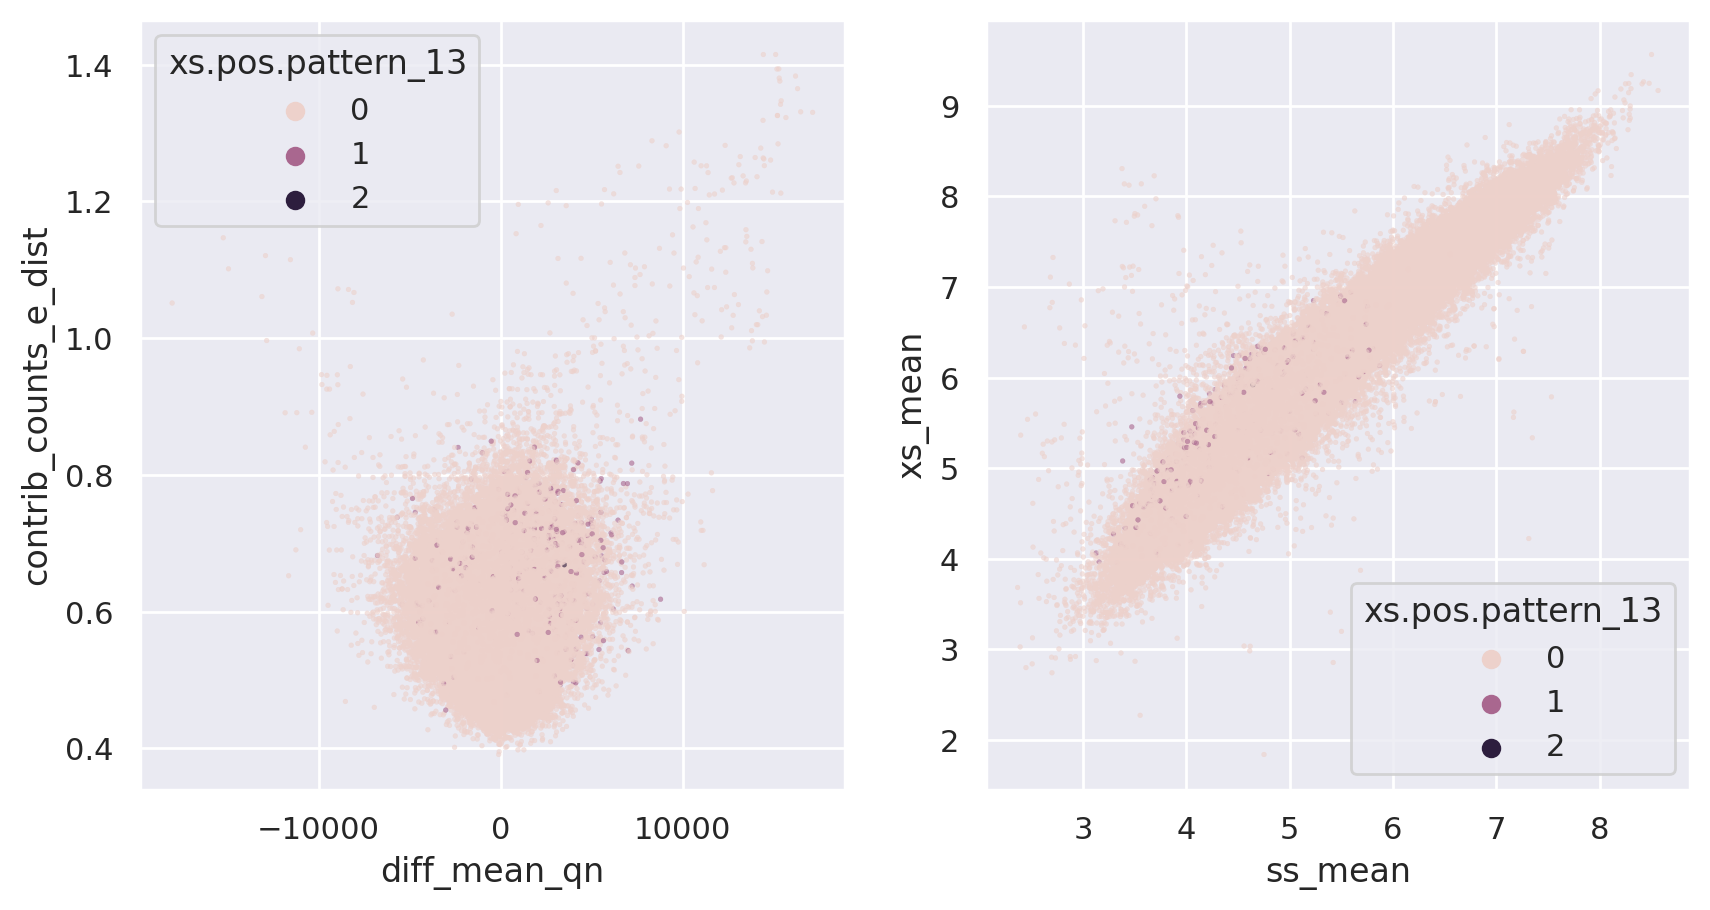

In [14]:
plot_pattern("xs.pos.pattern_13")



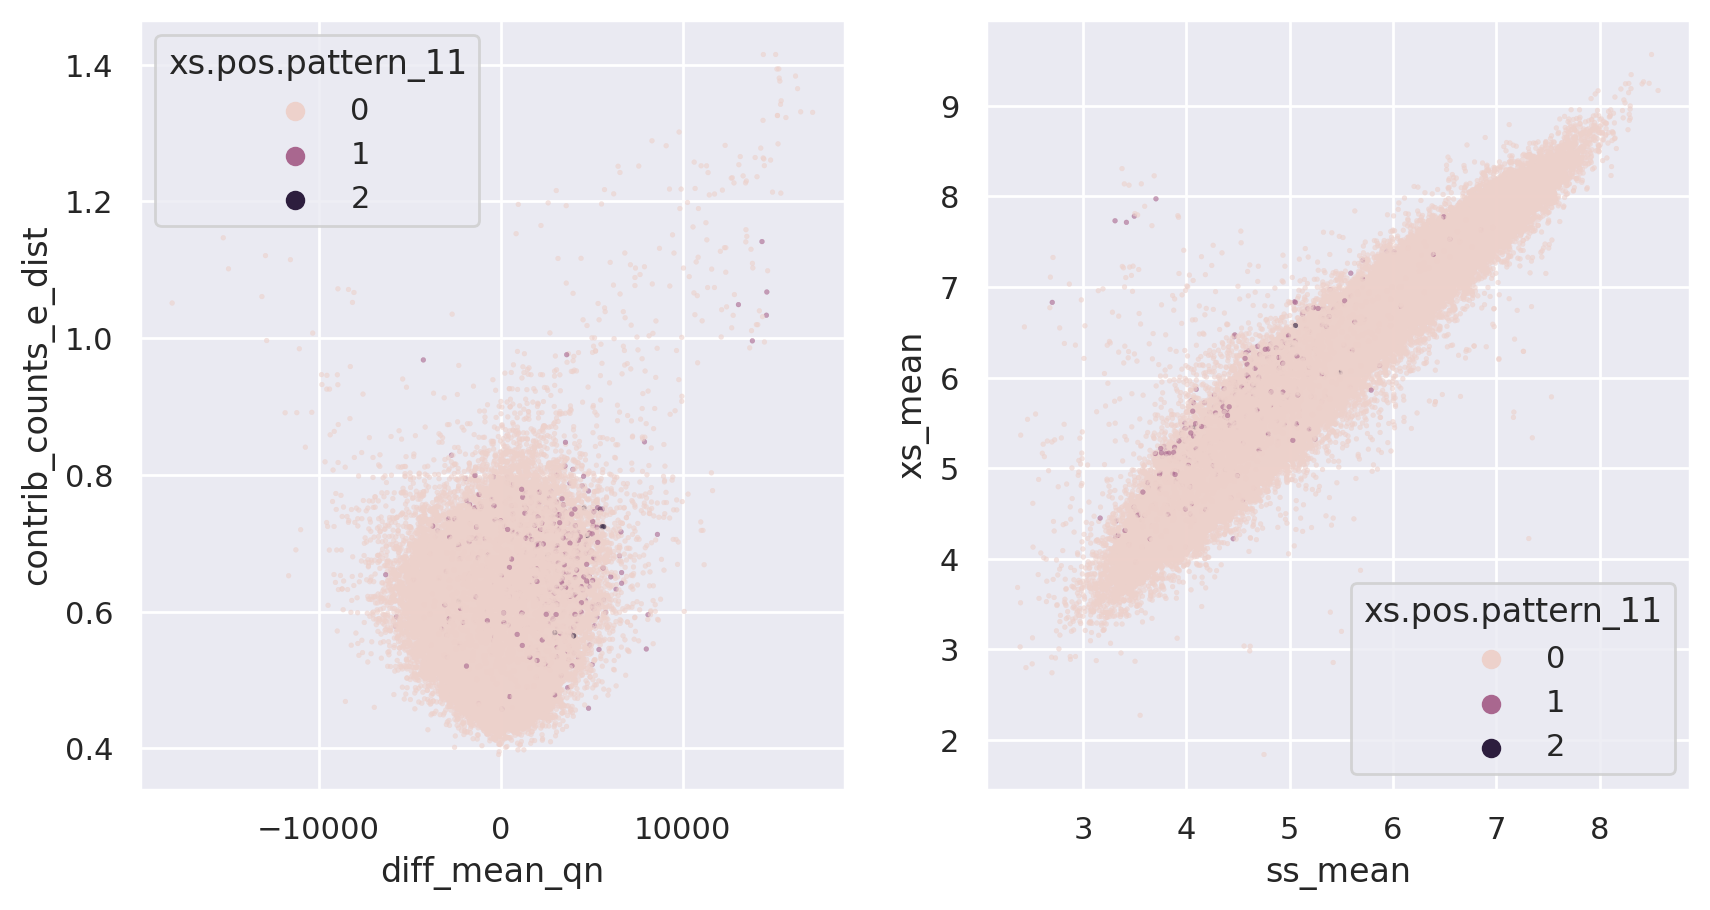

In [15]:
plot_pattern("xs.pos.pattern_11")


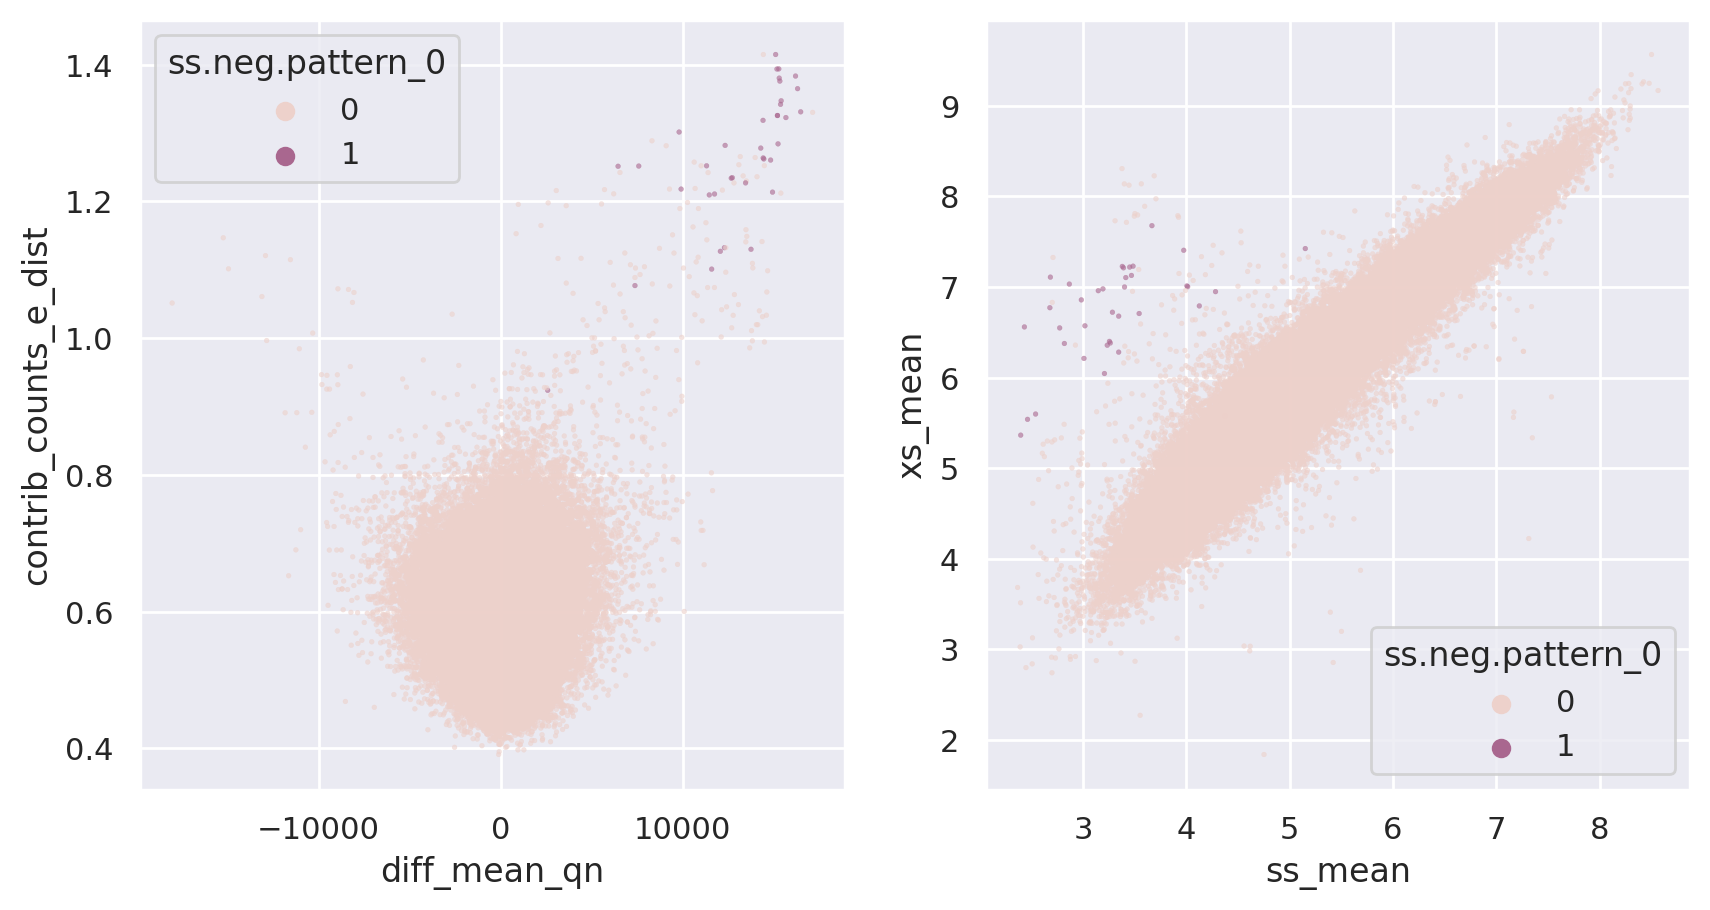

In [16]:
plot_pattern("ss.neg.pattern_0")
